### Dealing with Imbalanced Classes

#### Agenda
* What are imbalanced classes & their impact ?
* OverSampling
* UnderSampling
* Connecting Sampler to pipelines
* Making classification algorithm aware of Imbalance





### 1. Imbalanced Classes & Impact
* Data with skewed class distribution.
* Common examples are spam/ham mails, malicious/normal packets.
* Classification algorithms are prone to predict data with heavier class.
* accuracy_score is not the right matrix.
* We got to rely on matrices like confusion_matrix, recall, precision

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.datasets import make_blobs
import numpy as np
from sklearn.metrics import confusion_matrix
from collections import Counter

In [14]:
n_samples_1 = 1000
n_samples_2 = 100
centers = [[0.0, 0.0], [2.0, 2.0]]
clusters_std = 1.1
X, y = make_blobs(n_samples=[n_samples_1, n_samples_2],
                  centers=centers,
                  cluster_std=clusters_std,
                  random_state=0, shuffle=False)

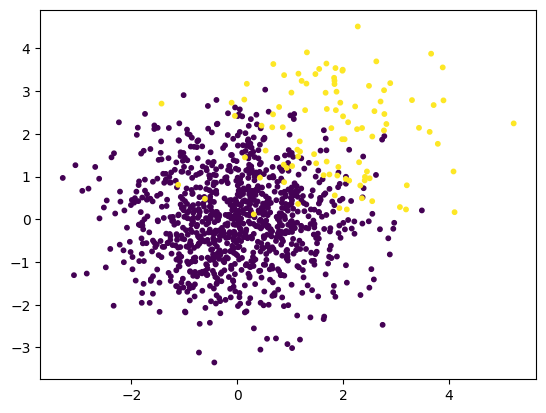

In [15]:
plt.scatter(X[:,0], X[:,1],s=10,c=y)

In [17]:
from sklearn.svm import SVC

In [23]:
svc = SVC(kernel='rbf', degree = 3, C = 100)

In [24]:
svc.fit(X,y)

SVC(C=100)

In [25]:
h = .02
x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

In [26]:
Z = svc.predict(np.c_[xx.ravel(), yy.ravel()])

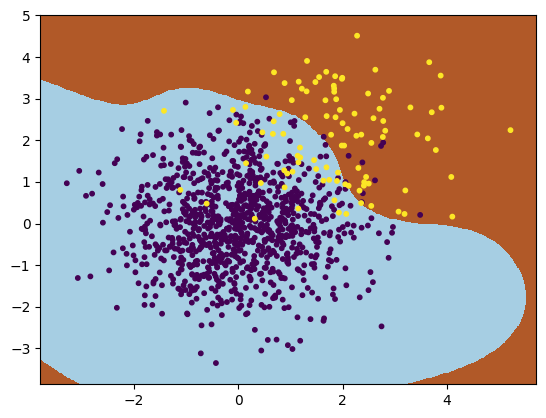

In [27]:
Z = Z.reshape(xx.shape)
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)
plt.scatter(X[:,0],X[:,1],c=y,s=10)

* As we can see, decision boundry is impacted
* imbalanced package provides many such sampling techniques - `pip install imbalanced-learn`

In [28]:
! pip install imbalanced-learn

### 2. OverSampling
* One way to fight this issue is to generate new samples in the classes which are under-represented.
* The most naive strategy is to generate new samples by randomly sampling with replacement the current available samples.
* RandomOverSampler is simpliest api to provide such functionality

#### RandomOverSampler

In [29]:
from sklearn.datasets import make_classification
X, y = make_classification(n_samples=2500, n_features=2, n_informative=2,
                            n_redundant=0, n_repeated=0, n_classes=3,
                            n_clusters_per_class=1,
                            weights=[0.03, 0.05, 0.92],
                            class_sep=0.9, random_state=10)

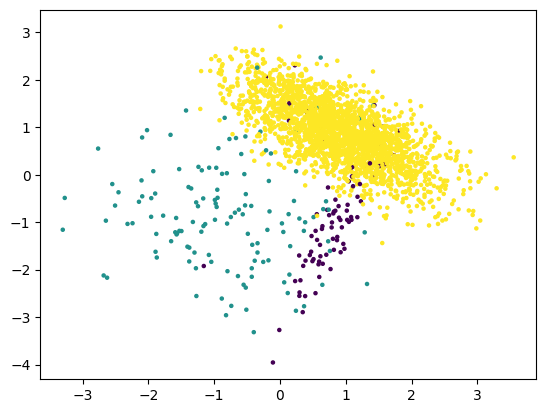

In [30]:
plt.scatter(X[:,0], X[:,1],s=5,c=y)

In [31]:
svc = SVC(C=100)
svc.fit(X,y)

SVC(C=100)

In [32]:
h = .02
x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

In [33]:
Z = svc.predict(np.c_[xx.ravel(), yy.ravel()])

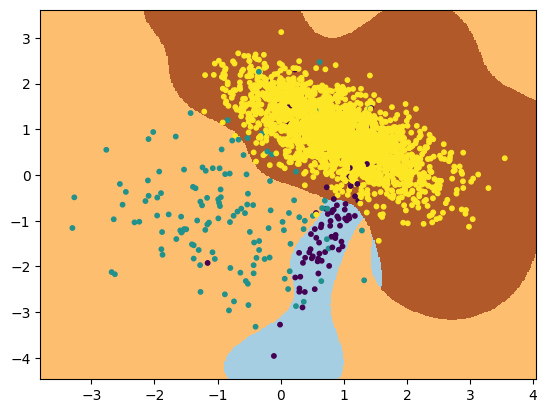

In [34]:
Z = Z.reshape(xx.shape)
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)
plt.scatter(X[:,0],X[:,1],c=y,s=10)

In [35]:
pred = svc.predict(X)

from sklearn.metrics import confusion_matrix

print (confusion_matrix(y, pred))

[[  54    2   29]
 [   7  112   13]
 [   0    2 2281]]


In [36]:
from imblearn.over_sampling import RandomOverSampler

In [37]:
ros = RandomOverSampler(random_state=0)

In [38]:
X_resampled, y_resampled = ros.fit_resample(X,y)

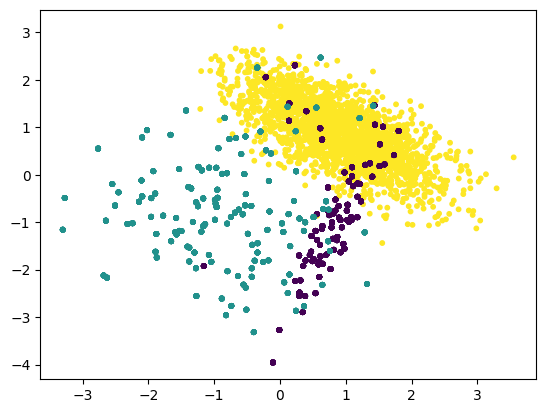

In [39]:
plt.scatter(X_resampled[:,0],X_resampled[:,1],c=y_resampled,s=10)

In [40]:
svc.fit(X_resampled,y_resampled)

SVC(C=100)

In [41]:
Z = svc.predict(np.c_[xx.ravel(), yy.ravel()])

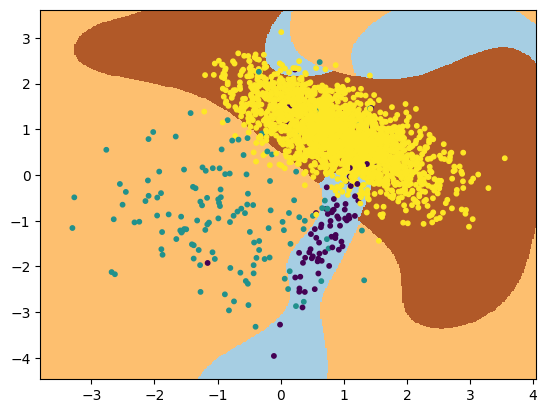

In [42]:
Z = Z.reshape(xx.shape)
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)
plt.scatter(X[:,0],X[:,1],c=y,s=10)

In [43]:
pred = svc.predict(X)
confusion_matrix(y_pred=pred, y_true=y)

array([[  66,    2,   17],
       [   9,  116,    7],
       [  80,   26, 2177]])

In [44]:
from sklearn.metrics import recall_score, f1_score

print(recall_score(y, pred, average="macro"))

0.8696094437456422


In [45]:
print(f1_score(y, pred, average="macro"))

0.7871959128969562


In [46]:
from sklearn.metrics import classification_report
print (classification_report(y,pred))

              precision    recall  f1-score   support

           0       0.43      0.78      0.55        85
           1       0.81      0.88      0.84       132
           2       0.99      0.95      0.97      2283

    accuracy                           0.94      2500
   macro avg       0.74      0.87      0.79      2500
weighted avg       0.96      0.94      0.95      2500



#### SMOTE (Synthetic Minority Oversampling Technique)
* Generates new samples by interpolation
* It doesn't duplicates data

In [47]:
from imblearn.over_sampling import SMOTE

In [48]:
X_resampled, y_resampled = SMOTE().fit_resample(X, y)

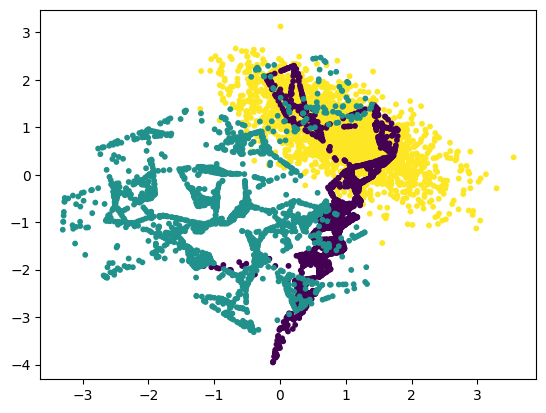

In [49]:
plt.scatter(X_resampled[:,0],X_resampled[:,1],c=y_resampled,s=10)

In [50]:
svc = SVC(kernel='rbf', C = 100)

In [51]:
svc.fit(X_resampled,y_resampled)

SVC(C=100)

In [52]:
Z = svc.predict(np.c_[xx.ravel(), yy.ravel()])

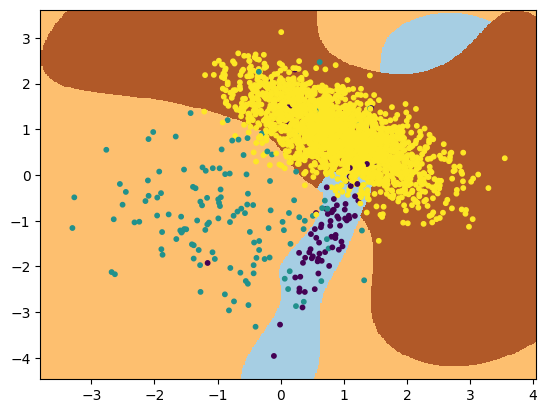

In [53]:
Z = Z.reshape(xx.shape)
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)
plt.scatter(X[:,0],X[:,1],c=y,s=10)

In [54]:
pred = svc.predict(X)
confusion_matrix(y_pred=pred, y_true=y)

array([[  65,    2,   18],
       [  11,  114,    7],
       [  71,   25, 2187]])

In [55]:
from sklearn.metrics import recall_score, f1_score

print(recall_score(y, pred, average="macro"))
print(f1_score(y, pred, average="macro"))

0.8620974372307758
0.7895302880286196


In [56]:
print(classification_report(pred, y))

              precision    recall  f1-score   support

           0       0.76      0.44      0.56       147
           1       0.86      0.81      0.84       141
           2       0.96      0.99      0.97      2212

    accuracy                           0.95      2500
   macro avg       0.86      0.75      0.79      2500
weighted avg       0.94      0.95      0.94      2500



#### ADASYN (Adaptive Synthetic Sampling Method)
* Similar to SMOTE, this also generates data.
* Generate samples to the original which are wrongly mis-classified
* SMOTE doen't consider this situation

In [57]:
from imblearn.over_sampling import ADASYN

In [58]:
X_resampled, y_resampled = ADASYN().fit_resample(X, y)

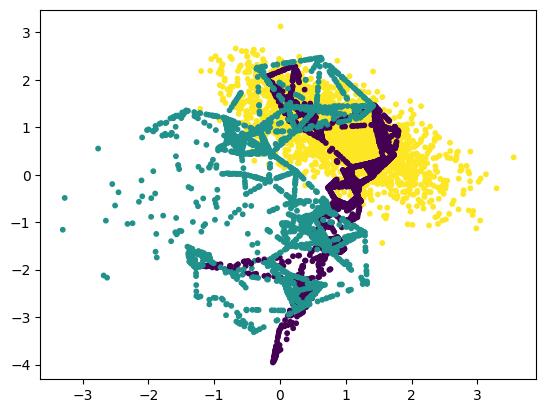

In [59]:
plt.scatter(X_resampled[:,0],X_resampled[:,1],c=y_resampled,s=10)

In [60]:
svc.fit(X_resampled,y_resampled)

SVC(C=100)

In [61]:
Z = svc.predict(np.c_[xx.ravel(), yy.ravel()])

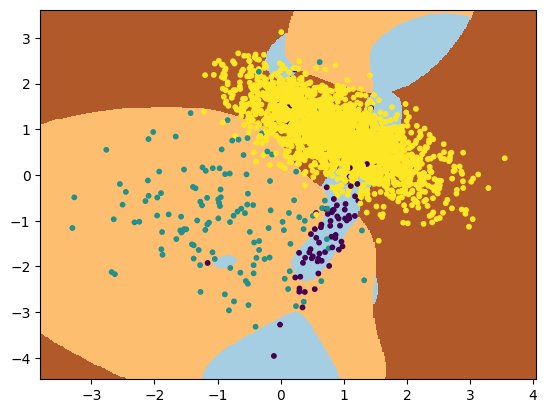

In [62]:
Z = Z.reshape(xx.shape)
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)
plt.scatter(X[:,0],X[:,1],c=y,s=10)

In [63]:
pred = svc.predict(X)
confusion_matrix(y_pred=pred, y_true=y)

array([[  64,   15,    6],
       [   4,  123,    5],
       [ 431,   45, 1807]])

In [64]:
from sklearn.metrics import recall_score, f1_score

print(recall_score(y, pred, average="macro"))
print(f1_score(y, pred, average="macro"))

0.8254205891331964
0.6271263130418765


In [65]:
print (classification_report(y, pred))

              precision    recall  f1-score   support

           0       0.13      0.75      0.22        85
           1       0.67      0.93      0.78       132
           2       0.99      0.79      0.88      2283

    accuracy                           0.80      2500
   macro avg       0.60      0.83      0.63      2500
weighted avg       0.95      0.80      0.85      2500



### 3. Undersampling
* Reducing the data of the over-represented class

#### RandomUnderSampler
* The reduced data is picked randomly from the sample & not derived

In [66]:
from imblearn.under_sampling import RandomUnderSampler

In [67]:
rus = RandomUnderSampler(sampling_strategy= 'majority', random_state=0)

In [68]:
X_resampled, y_resampled = rus.fit_resample(X, y)

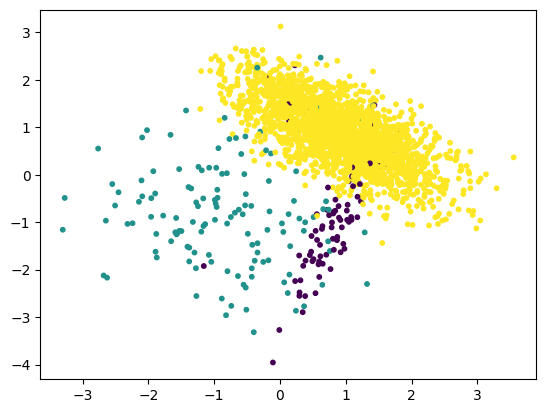

In [69]:
plt.scatter(X[:,0],X[:,1],c=y,s=10)

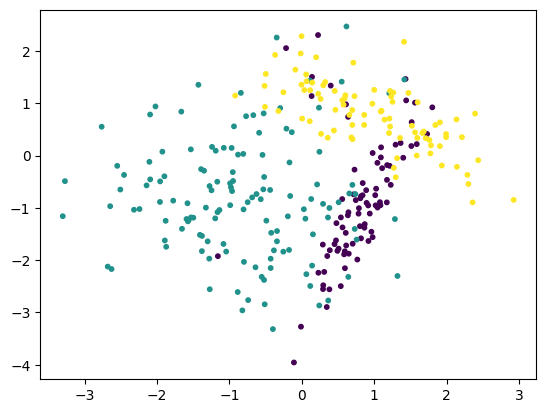

In [70]:
plt.scatter(X_resampled[:,0],X_resampled[:,1],c=y_resampled,s=10)

In [71]:
svc.fit(X_resampled,y_resampled)
Z = svc.predict(np.c_[xx.ravel(), yy.ravel()])

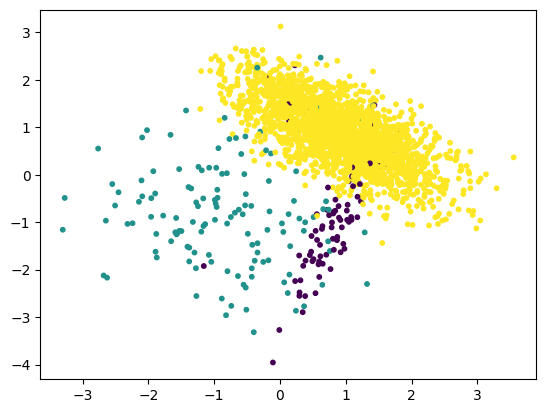

In [72]:
plt.scatter(X[:,0],X[:,1],c=y,s=10)

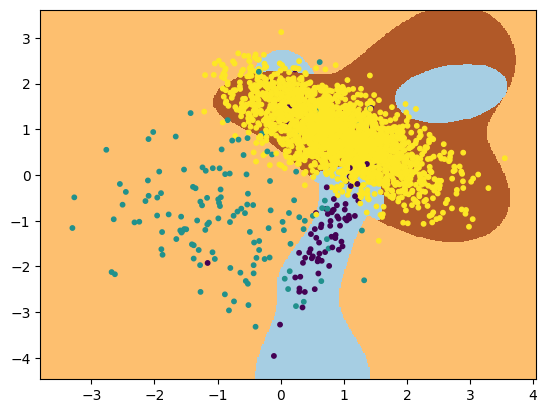

In [73]:
Z = Z.reshape(xx.shape)
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)
plt.scatter(X[:,0],X[:,1],c=y,s=10)

In [74]:
pred = svc.predict(X)
confusion_matrix(y_pred=pred, y_true=y)

array([[  68,    1,   16],
       [  12,  114,    6],
       [ 114,   60, 2109]])

In [75]:
from sklearn.metrics import recall_score, f1_score

print(recall_score(y, pred, average="macro"))
print(f1_score(y, pred, average="macro"))

0.8624736192410305
0.7285740127833348


In [76]:
print(classification_report(y,pred))

              precision    recall  f1-score   support

           0       0.35      0.80      0.49        85
           1       0.65      0.86      0.74       132
           2       0.99      0.92      0.96      2283

    accuracy                           0.92      2500
   macro avg       0.66      0.86      0.73      2500
weighted avg       0.95      0.92      0.93      2500



In [ ]:
print(sorted(Counter(y).items()))

[(0, 64), (1, 262), (2, 4674)]


In [ ]:
print(sorted(Counter(y_resampled).items()))

[(0, 64), (1, 64), (2, 64)]


#### ClusterCentroid for data generation
* Generating representative data using kmeans
* Centroids of clusters are used

In [77]:
from imblearn.under_sampling import ClusterCentroids

In [78]:
cc = ClusterCentroids(sampling_strategy= 'majority',random_state=0)

In [79]:
X_resampled, y_resampled = cc.fit_resample(X, y)

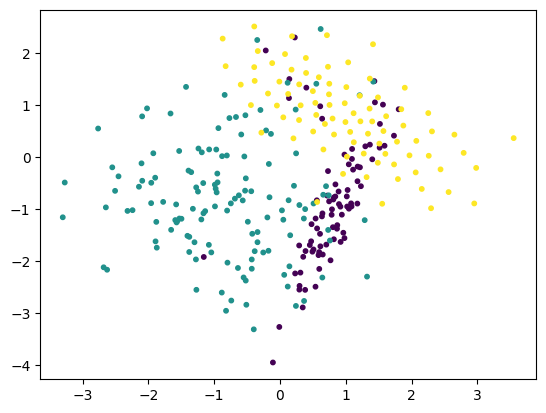

In [80]:
plt.scatter(X_resampled[:,0],X_resampled[:,1],c=y_resampled,s=10)

In [81]:
svc.fit(X_resampled,y_resampled)
Z = svc.predict(np.c_[xx.ravel(), yy.ravel()])

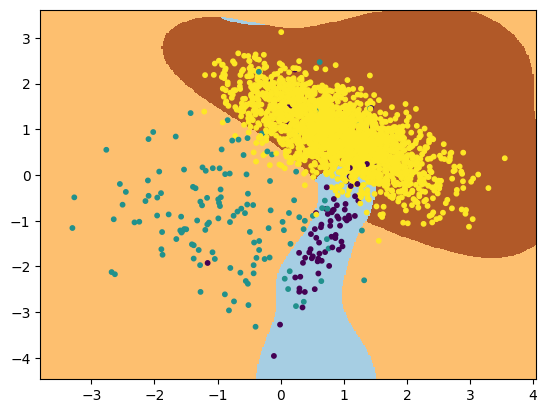

In [82]:
Z = Z.reshape(xx.shape)
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)
plt.scatter(X[:,0],X[:,1],c=y,s=10)

In [83]:
pred = svc.predict(X)
confusion_matrix(y_pred=pred, y_true=y)

array([[  67,    1,   17],
       [  11,  113,    8],
       [  99,   31, 2153]])

In [84]:
from sklearn.metrics import recall_score, f1_score

print(recall_score(y, pred, average="macro"))
print(f1_score(y, pred, average="macro"))

0.8624510936059209
0.7641964284907159


In [85]:
print(classification_report(y,pred))

              precision    recall  f1-score   support

           0       0.38      0.79      0.51        85
           1       0.78      0.86      0.82       132
           2       0.99      0.94      0.97      2283

    accuracy                           0.93      2500
   macro avg       0.72      0.86      0.76      2500
weighted avg       0.96      0.93      0.94      2500



### 4. Connecting Sampler to Pipelines
* We can any of these sampler to be part of pipeline so that we can validate them
* scikit pipeline is not capable of dealing with samplers & we have to use overridden pipeline by imblearn

In [86]:
from imblearn.pipeline import make_pipeline

In [87]:
from imblearn.combine import SMOTEENN, SMOTETomek

In [88]:
pipeline1 = make_pipeline(RandomOverSampler(),SVC(kernel='rbf'))

In [89]:
pipeline2 = make_pipeline(RandomUnderSampler(),SVC(kernel='rbf'))

In [90]:
pipeline3 = make_pipeline(SMOTEENN(), SVC(kernel='rbf'))

In [91]:
pipelines = [pipeline1,pipeline2,pipeline3]

In [92]:
for pipeline in pipelines:
    pipeline.fit(X,y)

In [93]:
for sampling_type, pipeline in zip(['oversampler','undersampler','combined'],pipelines):
    pred = pipeline.predict(X)
    print (sampling_type, '\n',confusion_matrix(y_pred=pred, y_true=y))
    print(recall_score(y, pred, average="macro"))
    print(f1_score(y, pred, average="macro"))
    print ('\n')

oversampler 
 [[  64    1   20]
 [  14  110    8]
 [  51   30 2202]]
0.850264959246949
0.7932797328333795


undersampler 
 [[  63    1   21]
 [  19  105    8]
 [  51   15 2217]]
0.8359072287378696
0.7956817480636106


combined 
 [[  66    1   18]
 [  14  110    8]
 [  97   26 2160]]
0.8519758144168751
0.7627732893135386




### 5. Making learning algorithms aware of class distribution
* Most of the classfication algorithms provides a method to pass class distribution information
* Internally, learning algorithm uses this & configures itself for justifying under represented class

In [94]:
from sklearn.svm import SVC

In [95]:
svc = SVC(kernel='rbf')

In [96]:
svc.fit(X,y)

SVC()

In [97]:
pred = svc.predict(X)

In [98]:
confusion_matrix(y_pred=pred, y_true=y)

array([[  54,    1,   30],
       [  16,   98,   18],
       [   1,    0, 2282]])

In [99]:
svc = SVC(kernel='rbf', class_weight='balanced')

In [100]:
svc.fit(X,y)

SVC(class_weight='balanced')

In [101]:
pred = svc.predict(X)

In [102]:
confusion_matrix(y_pred=pred, y_true=y)

array([[  66,    1,   18],
       [  14,  111,    7],
       [  72,   29, 2182]])